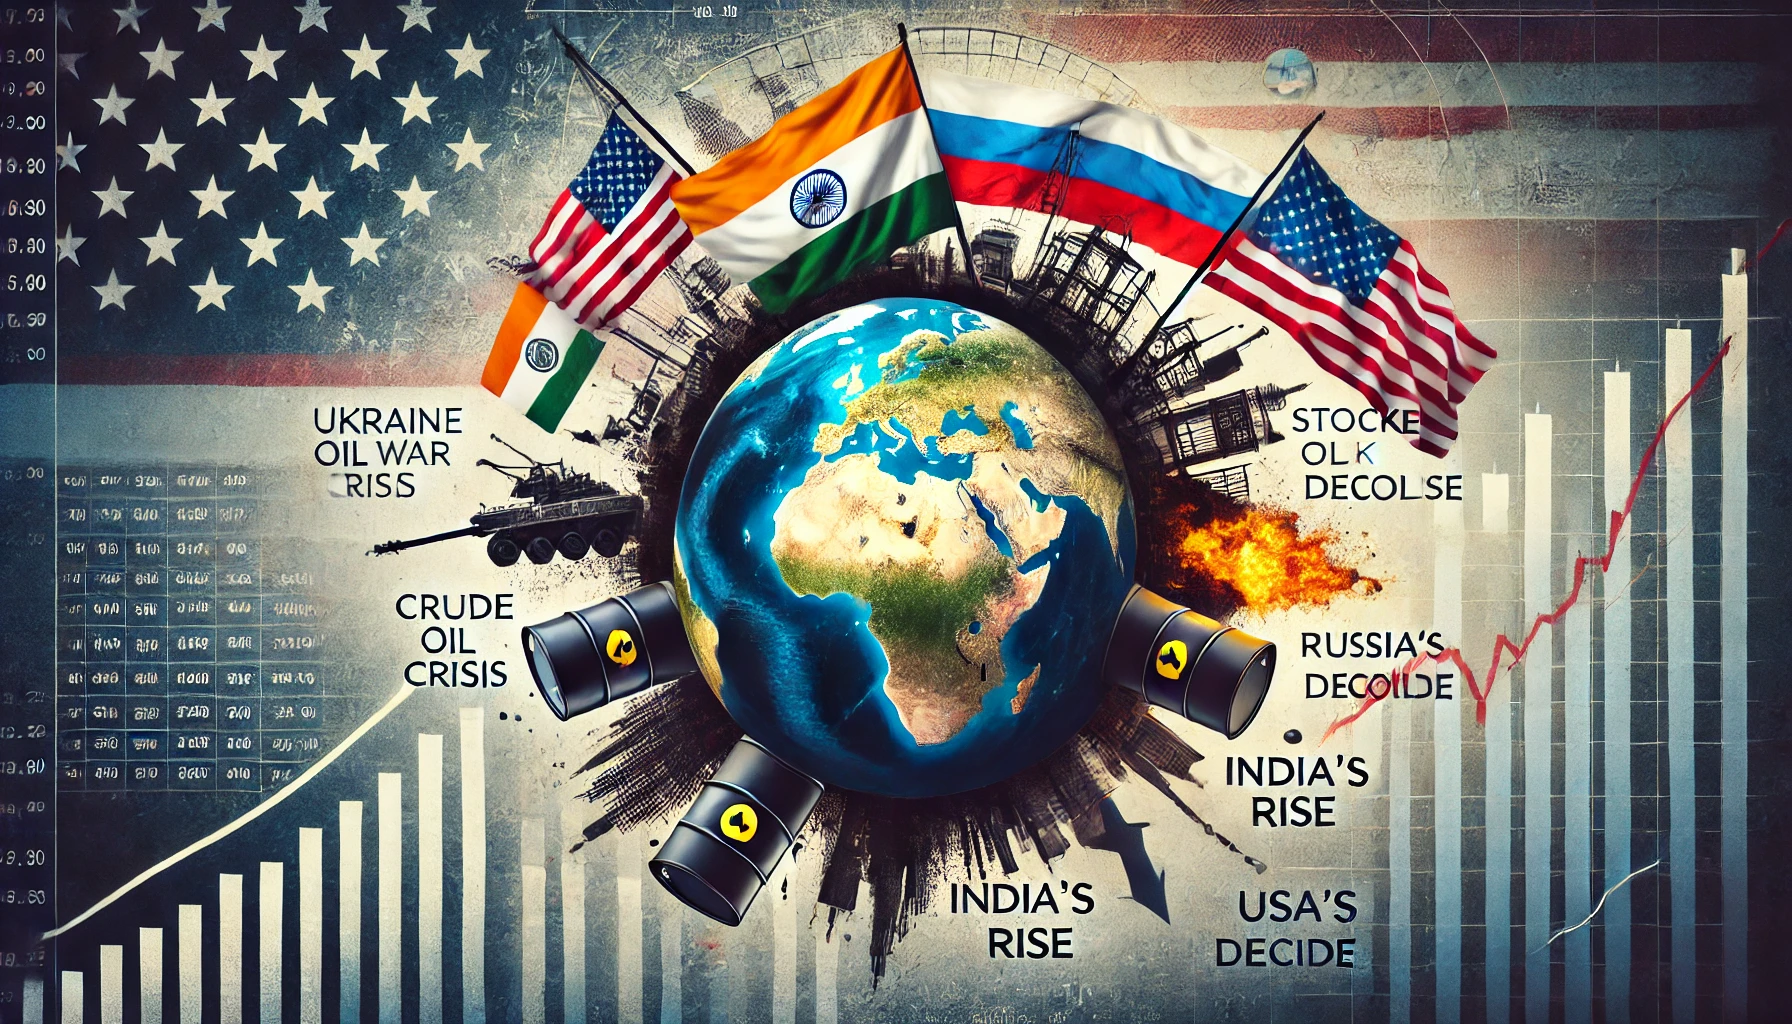

# Problem Statement

The proliferation of bot-generated comments on online platforms has raised concerns about the authenticity of public discourse, especially on politically sensitive topics. In the context of the interview between Vladimir Putin and Tucker Carlson, it is crucial to distinguish between genuine user comments and bot-generated content to understand the true sentiment of the audience. This project aims to analyze and classify the sentiment of comments related to the interview, investigating the extent and influence of bot activity on public opinion.

# Objectives

1. **Segregate Comments:**
   - Identify and separate bot-generated comments from genuine user comments in the dataset.

2. **Sentiment Analysis:**
   - Perform sentiment analysis on both bot and user comments to determine the overall sentiment distribution.

3. **Analyze Bot Behavior:**
   - Investigate the characteristics of bot-generated comments, including their sentiment, timing, and engagement metrics (likes and replies).

4. **Compare Sentiment Trends:**
   - Compare the sentiment trends between bot and genuine comments to assess any discrepancies and potential biases.

5. **Infer Influence:**
   - Draw inferences on how bot comments may influence public perception, particularly in the context of politically charged content.

# Impacts

- **Understanding Public Sentiment:**
   - By accurately identifying and analyzing bot comments, this project provides a clearer picture of genuine public sentiment regarding the interview, helping to filter out artificial influence.

- **Mitigating Misinformation:**
   - The findings can be used to develop strategies for mitigating the impact of bot-generated content, ensuring that public discourse remains authentic and unbiased.

- **Enhanced Content Moderation:**
   - Insights from this analysis can aid in the development of more effective content moderation tools that can automatically detect and manage bot activity.

# Approach

1. **Data Collection and Preparation:**
   - Gather the dataset of comments related to the Putin-Carlson interview.
   - Preprocess the data to clean and structure it for analysis.

2. **Segregation of Comments:**
   - Implement a method to identify and separate bot-generated comments based on the frequency of repetition and other identifiable patterns.

3. **Sentiment Analysis:**
   - Utilize the Natural Language Toolkit (NLTK) library to perform sentiment analysis on both bot and user comments, categorizing them as positive, negative, or neutral.

4. **Bot Comment Analysis:**
   - Conduct a detailed examination of bot comments, including their publication time, number of likes, and replies, to identify patterns and anomalies.

5. **Comparison and Inference:**
   - Compare the sentiment distribution between bot and genuine comments and analyze the potential influence of bot activity on overall public sentiment.

# Project Summary

The project appears to focus on sentiment analysis of comments related to an interview between **Vladimir Putin** and **Tucker Carlson**. Here's a summary of the project based on the content extracted from the notebook:

***Objective***
The goal of this project is to analyze and classify the sentiment of comments made on the Putin-Carlson interview. The analysis seeks to differentiate between bot-generated comments and genuine user comments, and to assess the sentiment associated with each type of comment.

***Key Steps and Findings***

1. **Data Segregation:**
   - The comments dataset is first divided into bot comments and real (genuine user) comments. The project identifies any comment that appears more than once in the dataset as a bot comment.
   - It is noted that a significant majority (99.70%) of the comments are identified as bot-generated, leaving a small portion (298 out of 100,000 comments) as genuine user comments.

2. **Sentiment Analysis:**
   - Sentiment analysis is performed separately on the bot and user comments using the Natural Language Toolkit (NLTK) library.
   - The analysis reveals that both bot and user comments generally skew towards positive sentiment. However, bot comments show a stronger skew towards positive sentiment, as there are no bot comments with sentiment values below a certain threshold (-0.6).

3. **Bot Comment Analysis:**
   - A closer inspection of the bot comments reveals that they tend to align with particular viewpoints, with a noticeable number of them supporting Russia. However, there are also bot comments opposing this viewpoint.
   - Some bot comments are identified as engagement boosters or bait, designed to simulate user interaction.
   - The comments are published simultaneously and share the same number of likes and replies, suggesting that these engagement metrics were pre-determined during comment generation.
   - It is observed that negative bot comments generally receive fewer likes and replies compared to positive bot comments, which might indicate an attempt to skew the perceived sentiment towards positivity.

4. **Conclusion:**
   - The sentiment analysis results suggest that while the overall sentiment is mixed, it leans towards positivity, particularly in bot comments. The project highlights the prevalence of bot activity in online discussions, especially in politically sensitive content, and suggests that these bot comments are likely engineered to influence public perception by appearing more popular and positively received than they might be.

***Tools and Libraries***
- The NLTK library is used for sentiment analysis, leveraging its built-in capabilities to analyze the sentiment of textual data.

***Insights***
- The project provides valuable insights into the behavior and impact of bot comments on online discourse, particularly in politically charged discussions. It underscores the importance of distinguishing between genuine and bot-generated content when analyzing public sentiment on sensitive issues.

This summary encapsulates the main aspects and findings of the project based on the extracted content. If you need further analysis or specific details, feel free to ask!

# Importing Necessary Libraries

In [27]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load the Dataset

In [2]:
!git clone https://github.com/sdey270796/Sentiment-Analysis-of-Putin-Carlson-Interview.git

Cloning into 'Sentiment-Analysis-of-Putin-Carlson-Interview'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 4.27 MiB | 7.32 MiB/s, done.


In [3]:
file_path = '/content/Sentiment-Analysis-of-Putin-Carlson-Interview/putin_tucker.csv'
df = pd.read_csv(file_path, sep = ',')
df.head()

,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Watch my immediate reaction to the interview h...,533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...,2024-02-08T23:44:11Z,25601,750
1,The Russian to English translator did an EXCEL...,e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...,2024-02-09T02:33:19Z,79514,750
2,The translation from Russian to English was ex...,c4add09939263f9b8509035f63b869662bc542641a3dc3...,2024-02-19T04:32:50Z,265,5
3,That was the longest 1 minute and 30 seconds h...,5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...,2024-02-18T06:58:59Z,1076,27
4,What's the difference between Tucker and a mob...,05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...,2024-02-19T09:52:34Z,70,0


## Dataset Description

***Overview***

This dataset encapsulates a comprehensive collection of public sentiments expressed through comments on a pivotal interview featuring Vladimir Putin and Tucker Carlson. The conversation, set against the backdrop of a tumultuous global economy and the critical discourse surrounding Putin's maneuvers in Ukraine, offers a deep dive into the reasons and viewpoints presented by the Russian leader. With over 100,000 comments, this dataset not only reflects diverse global perspectives but also serves as a mirror to the world's reaction to key international events discussed in the interview.

***Data Science Applications***
- **Natural Language Processing (NLP):** Utilize advanced NLP techniques, such as sentiment analysis, topic modeling, and emotion detection, to uncover underlying patterns and sentiments. Tools like BERT and GPT can offer nuanced insights into public opinion and discourse trends.

- **Machine Learning:** Employ machine learning algorithms to classify comments, predict sentiment scores, and analyze engagement metrics, providing a quantitative understanding of viewer reactions.

- **Data Visualization:** Create compelling visualizations to represent sentiment distributions, temporal trends in comment activity, and correlations between engagement metrics and sentiment.

***Column Descriptors:***
- **Comment:** The textual content of the user's comment.
- **Anonymized Author:** A SHA-256 hashed representation of the comment author's username to ensure privacy.
- **Published At:** Timestamp indicating when the comment was posted.
- **Likes:** The number of likes a comment received.
- **Reply Count:** The number of replies to the comment.

***Ethically Mined Data***

This dataset was ethically sourced, respecting user privacy and adhering to platform guidelines. Personal identifiers have been anonymized to maintain confidentiality.

***Acknowledgments***

We extend our gratitude to YouTube for facilitating an open platform where such vibrant discussions can take place and to the data science community for providing the tools and methodologies that enable this analysis.

***Special Note to Data Scientists***

As data scientists, we approach this dataset with neutrality, aiming to extract insights without bias. Our role is to analyze and interpret the data impartially, contributing to a broader understanding of public sentiment on significant global issues. Let's harness this opportunity to showcase the power of data science in illuminating the complexities of human discourse.

## Basic Checks

In [4]:
df.shape

(100000, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,100000.0,52.22723,310.010713,0.0,0.0,2.0,11.0,79514.0
Reply Count,100000.0,2.38692,7.695083,0.0,0.0,0.0,1.0,750.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Comment            100000 non-null  object
 1   Anonymized Author  100000 non-null  object
 2   Published At       100000 non-null  object
 3   Likes              100000 non-null  int64 
 4   Reply Count        100000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

,0
Comment,0
Anonymized Author,0
Published At,0
Likes,0
Reply Count,0


# Examine the Distribution of Comment Counts per Unique Subject

- To further investigate the low unique count, we analyzed the distribution of comment counts across unique subjects.

- As illustrated below, bot comment clusters are clearly identifiable. The majority of these clusters have repetition counts that are multiples of 997 (e.g., 997, 1994).

- These clusters account for 97 unique comments out of a total of 401, representing 24.19% of the dataset.

- The remaining clusters with more than one comment appear to be incomplete bot comment clusters that were not fully captured in the dataset. This observation holds true even for clusters with just two comments.

- It is important to note that while the single-comment clusters are less likely to contain bot comments, we cannot entirely rule out this possibility.

In [8]:
unique_comment_dist = df.groupby('Comment')['Anonymized Author'].count().sort_values(ascending=False)

In [9]:
uc = np.unique(unique_comment_dist.values, return_counts=True)

In [10]:
uc_df = pd.DataFrame({'Number of comments with the same text':uc[0],
                      'Number of unique comment contents that have this number of repetitions':uc[1]})

uc_df.head()

,Number of comments with the same text,Number of unique comment contents that have this number of repetitions
0,1,298
1,2,1
2,5,1
3,128,1
4,324,1


In [12]:
display(HTML(uc_df.to_html(index=False)))

Number of comments with the same text,Number of unique comment contents that have this number of repetitions
1,298
2,1
5,1
128,1
324,1
545,1
992,1
997,96
1994,1


<Axes: title={'center': 'Distribution of comment counts per unique subject'}, xlabel='Unique comment', ylabel='Repetition count'>

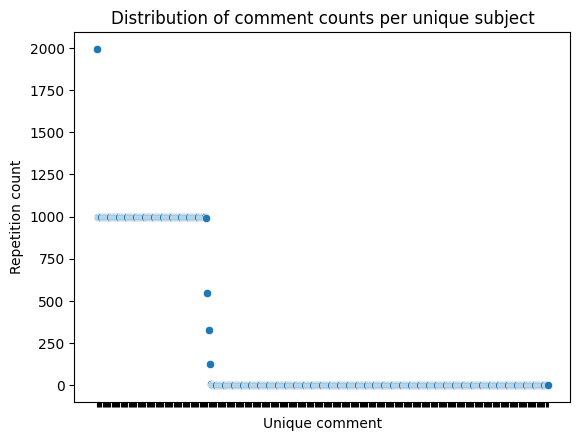

In [13]:
_ = sns.scatterplot(unique_comment_dist)
_.set_xticklabels([])
_.set_xlabel('Unique comment')
_.set_ylabel('Repetition count')
_.set_title('Distribution of comment counts per unique subject')
_

This plot is a scatter plot titled "Distribution of comment counts per unique subject." It visualizes the repetition count of comments against their uniqueness. Here's an explanation:

***Axes***
- **X-Axis (Unique comment):** Each point along the x-axis represents a unique comment in the dataset. Due to the large number of unique comments, they are densely packed on this axis.
- **Y-Axis (Repetition count):** The y-axis represents the number of times a particular comment is repeated in the dataset. Higher values indicate comments that appear more frequently.

***Key Observations***
1. **Clustering at Specific Repetition Counts:**
   - There are distinct clusters of comments at specific repetition counts:
     - **At 2000:** A few comments are repeated exactly 1994 times.
     - **At 1000:** A significant number of comments are repeated exactly 997 times.
     - **At lower values:** There are fewer comments with repetition counts below 500.
     - **At 0 (single occurrence):** The majority of the comments appear only once.

2. **Interpretation:**
   - **High Repetition Clusters (997 and 1994):** The comments that are repeated 997 and 1994 times are likely bot-generated, as their exact repetition indicates automated behavior. The consistency in repetition suggests that these comments were pre-generated and distributed across various subjects.
   - **Single Occurrence Comments:** The majority of comments that appear only once are more likely to be genuine user-generated content. These comments show no repetition, which is typical for organic conversations.

The plot visually confirms that certain comments (likely bot comments) have been repeated a large number of times, either 997 or 1994 times, which indicates systematic bot activity. In contrast, genuine user comments tend to appear only once, suggesting organic engagement. This distribution highlights the presence of bots in the dataset and their significant contribution to repeated content, which might skew perceived sentiment or engagement metrics.

# Segregation of Bot Comments from Genuine Comments

- Based on our previous analysis, any comment that appears more than once in the dataset can be classified as a bot comment.

- An overwhelming 99.70% of the comments in the dataset are identified as bot comments, leaving only 298 out of 100,000 comments as likely genuine user contributions. While this figure may still include some inaccuracies, we will assume that unique comments are authentic.

- It is also worth noting that bot comments tend to receive significantly less engagement compared to genuine user comments, with the 99th percentile of bot comments garnering 471 likes, compared to 19,898 likes for genuine user comments.

In [14]:
df['DEV__IsBotComment'] = df['Comment'].isin(unique_comment_dist[unique_comment_dist > 1].index)
df['DEV__IsBotComment'].value_counts()

,count
DEV__IsBotComment,
True,99702
False,298


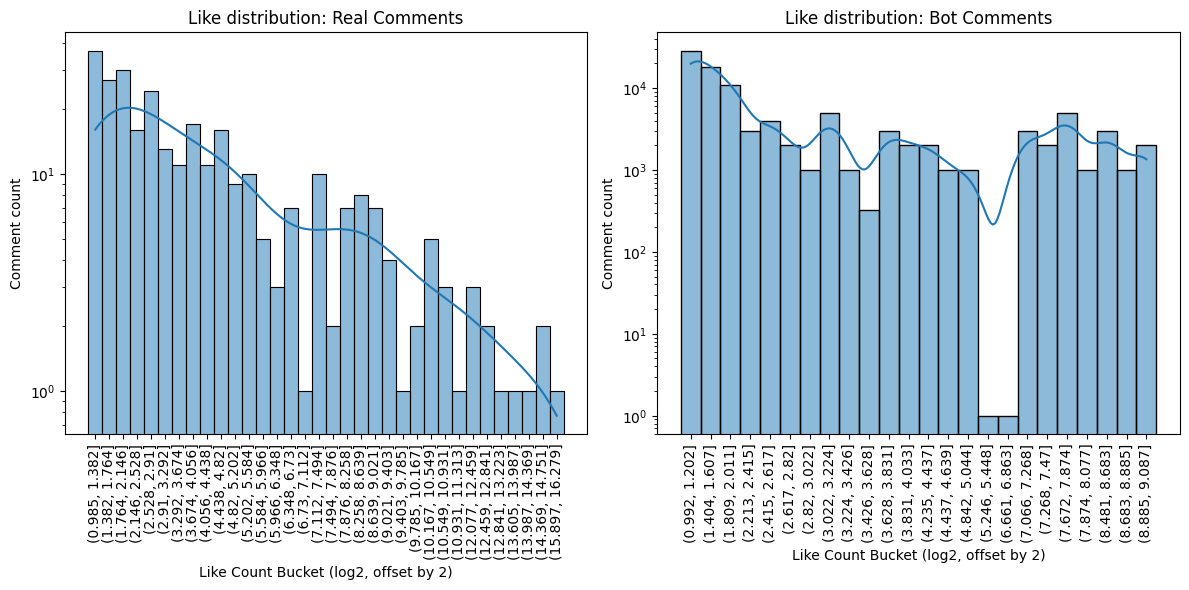

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Real comment histogram
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Offset by 2 to prevent log of zero.
    bucketed_like_counts = pd.cut(np.log2(df[~df['DEV__IsBotComment']]['Likes'].sort_values() + 2),bins=40).astype(str)
    sns.histplot(bucketed_like_counts,
                 kde=True,
                 ax=axs[0])
    axs[0].set_xticklabels(axs[0].get_xticklabels(),
                           rotation=90)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('Like Count Bucket (log2, offset by 2)')
    axs[0].set_ylabel('Comment count')
    axs[0].set_title('Like distribution: Real Comments')

# Bot comment histogram
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Offset by 2 to prevent log of zero.
    bucketed_like_counts = pd.cut(np.log2(df[df['DEV__IsBotComment']]['Likes'].sort_values() + 2), bins=40).astype(str)
    sns.histplot(bucketed_like_counts,
                 kde=True,
                 ax=axs[1])
    axs[1].set_xticklabels(axs[1].get_xticklabels(),
                           rotation=90)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Like Count Bucket (log2, offset by 2)')
    axs[1].set_ylabel('Comment count')
    axs[1].set_title('Like distribution: Bot Comments')


plt.tight_layout()
plt.show()

This plot consists of two side-by-side histograms, each representing the distribution of "likes" received by comments, categorized into "Real Comments" and "Bot Comments." The x-axis represents the like count buckets (on a logarithmic scale with base 2, offset by 2), and the y-axis represents the count of comments within each bucket, also on a logarithmic scale. A trend line is superimposed on the histograms to visualize the general distribution pattern.

***Left Plot: Like Distribution for Real Comments***
- **Distribution Pattern:** The distribution of likes for real comments shows a generally decreasing trend, with more comments receiving lower like counts and fewer comments receiving higher like counts.
- **Interpretation:** This indicates that most real comments do not receive a high number of likes, with the number of comments decreasing as the like count increases. The gradual decline suggests a natural distribution where only a few real comments gain significant popularity.

***Right Plot: Like Distribution for Bot Comments***
- **Distribution Pattern:** The distribution of likes for bot comments shows a different pattern compared to real comments. It has a more uniform distribution across several like count buckets, with some noticeable peaks and valleys.
- **Interpretation:** This more uniform distribution, with certain peaks, suggests that bot comments are engineered to receive a predefined number of likes, rather than organically accumulating them. The presence of dips in certain like buckets may indicate thresholds or limits imposed during the bot's programming, resulting in uneven distribution. The flatter trend indicates that bot comments are designed to create an impression of uniform engagement.

***Comparison***
- **Real Comments:** The like distribution for real comments is more natural, following a trend where few comments gain significant attention while the majority remain less popular.
- **Bot Comments:** The like distribution for bot comments is more artificial, with a relatively even spread across different like buckets, likely due to pre-set parameters. This indicates an attempt to create a false sense of engagement.

The plots demonstrate the difference in engagement patterns between real and bot-generated comments. Real comments exhibit a more organic and varied distribution of likes, while bot comments show signs of manipulation, with a more controlled and even distribution across various like levels. This highlights the artificial nature of bot activity and its potential to distort perceived public sentiment.

In [18]:
df[~df['DEV__IsBotComment']]['Likes'].describe(percentiles=[.25, .75, .9, .95, .99]).rename('Likes on real comments')

,Likes on real comments
count,298.000000
mean,766.218121
std,5224.981883
min,0.000000
25%,2.000000
50%,8.000000
75%,52.500000
90%,477.200000
95%,1414.650000
99%,19898.090000


In [19]:
df[df['DEV__IsBotComment']]['Likes'].describe(percentiles=[.25, .75, .9, .95, .99]).rename('Likes on bot comments')

,Likes on bot comments
count,99702.000000
mean,50.093178
std,116.362272
min,0.000000
25%,0.000000
50%,2.000000
75%,11.000000
90%,214.000000
95%,389.000000
99%,471.000000


In [20]:
df_gen = df[~df['DEV__IsBotComment']].drop(['DEV__IsBotComment', 'Published At', 'Anonymized Author'], axis=1)
df_bot = df[ df['DEV__IsBotComment']].drop(['DEV__IsBotComment', 'Published At', 'Anonymized Author'], axis=1)

In [21]:
df_gen.head()

,Comment,Likes,Reply Count
0,Watch my immediate reaction to the interview h...,25601,750
1,The Russian to English translator did an EXCEL...,79514,750
2,The translation from Russian to English was ex...,265,5
3,That was the longest 1 minute and 30 seconds h...,1076,27
4,What's the difference between Tucker and a mob...,70,0


In [22]:
df_bot.head()

,Comment,Likes,Reply Count
73,The look on Tucker's face at the end of interv...,114,0
200,The look on Tucker's face at the end of interv...,39,1
300,Tucker: Why did you invade Ukraine?\n\nPutin: ...,2,0
301,Cant wait to see how the press spins this tomo...,471,16
302,"Hey Tucker! If you like Russia so much, you ca...",4,1


In [23]:
df_bot_unique = df_bot.groupby('Comment').agg(['mean', 'count'])

In [24]:
df_bot_unique_df = pd.DataFrame({'Likes': df_bot_unique['Likes']['mean'],
                                 'Reply Count': df_bot_unique['Reply Count']['mean']}).reset_index()

# Semantic Analysis

- With the comments now segregated, we can proceed to analyze them separately.

- For this analysis, I will utilize the NLTK library.

- The plots indicate that both user and bot comments are generally skewed towards positive sentiment.

- While the overall sentiment is mixed, it leans more towards the positive side.

- Specifically, for bot comments, the skew towards positive sentiment is even more pronounced, as there are no comments with a sentiment score below the -0.6 threshold.

In [26]:
import subprocess
wordnet_path = '/usr/share/nltk_data/corpora/wordnet.zip'
command = f"unzip {wordnet_path} -d /usr/share/nltk_data/corpora/"
subprocess.run(command.split())
nltk.data.path.append('/usr/share/nltk_data')

In [28]:
print(wn.ensure_loaded())

None


In [29]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [31]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [32]:
def analyze_comment_df(df):
    df['DEV__PreprocessedComment'] = df['Comment'].apply(preprocess_text)
    df['DEV__Sentiment'] = df['DEV__PreprocessedComment'].apply(lambda text: sia.polarity_scores(text))

    for arg in ['neg','neu','pos','compound']:
        df['DEV__Sentiment__' + arg] = df['DEV__Sentiment'].apply(lambda x: x[arg])

    return df.drop('DEV__Sentiment', axis=1)

In [34]:
df_gen_res = analyze_comment_df(df_gen)
df_gen_res.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,298.0,766.218121,5224.981883,0.0000,2.00000,8.0000,52.50000,79514.0000
Reply Count,298.0,18.077181,87.847956,0.0000,0.00000,1.0000,3.00000,750.0000
DEV__Sentiment__neg,298.0,0.074651,0.133683,0.0000,0.00000,0.0000,0.12100,0.7920
DEV__Sentiment__neu,298.0,0.643470,0.254890,0.0000,0.46225,0.6320,0.83750,1.0000
DEV__Sentiment__pos,298.0,0.281859,0.255651,0.0000,0.00000,0.2520,0.44875,1.0000
DEV__Sentiment__compound,298.0,0.293348,0.450565,-0.9428,0.00000,0.3612,0.65970,0.9903


In [44]:
df_gen_res.head()

,Comment,Likes,Reply Count,DEV__PreprocessedComment,DEV__Sentiment__neg,DEV__Sentiment__neu,DEV__Sentiment__pos,DEV__Sentiment__compound
0,Watch my immediate reaction to the interview h...,25601,750,watch immediate reaction interview : http : //...,0.000,1.000,0.000,0.0000
1,The Russian to English translator did an EXCEL...,79514,750,russian english translator excellent job ! ! !...,0.000,0.451,0.549,0.7067
2,The translation from Russian to English was ex...,265,5,translation russian english exceptionally well...,0.000,0.651,0.349,0.3989
3,That was the longest 1 minute and 30 seconds h...,1076,27,longest 1 minute 30 second history explanation...,0.000,1.000,0.000,0.0000
4,What's the difference between Tucker and a mob...,70,0,'s difference tucker mobile hard drive ? hard ...,0.219,0.781,0.000,-0.2023


In [35]:
df_bot_res = analyze_comment_df(df_bot_unique_df)
df_bot_res.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,103.0,49.451456,115.427520,0.0000,0.000,2.0000,11.0000,542.0000
Reply Count,103.0,2.276757,5.924668,0.0000,0.000,0.0000,1.0000,35.0000
DEV__Sentiment__neg,103.0,0.066612,0.115845,0.0000,0.000,0.0000,0.1185,0.5650
DEV__Sentiment__neu,103.0,0.691417,0.272033,0.0000,0.507,0.6870,1.0000,1.0000
DEV__Sentiment__pos,103.0,0.232272,0.239874,0.0000,0.000,0.1870,0.3840,0.8700
DEV__Sentiment__compound,103.0,0.257709,0.412521,-0.6416,0.000,0.2023,0.6249,0.9723


In [45]:
df_bot_res.head()

,Comment,Likes,Reply Count,DEV__PreprocessedComment,DEV__Sentiment__neg,DEV__Sentiment__neu,DEV__Sentiment__pos,DEV__Sentiment__compound
0,"""Sometimes people don't want to hear the truth...",29.0,8.0,`` sometimes people n't want hear truth n't wa...,0.259,0.587,0.154,0.0572
1,1:10:54 same question!,0.0,0.0,1:10:54 question !,0.000,1.000,0.000,0.0000
2,34.8 million views on X after 3 hours.\nOnly a...,219.0,26.0,34.8 million view x 3 hour . 321k youtube.🤔🤔🤔,0.000,1.000,0.000,0.0000
3,"46:22 - a bit disgusting moment, but translati...",0.0,0.0,"46:22 - bit disgusting moment , translation ma...",0.275,0.507,0.218,-0.3245
4,862 is 9th century.,1.0,0.0,862 9th century .,0.000,1.000,0.000,0.0000


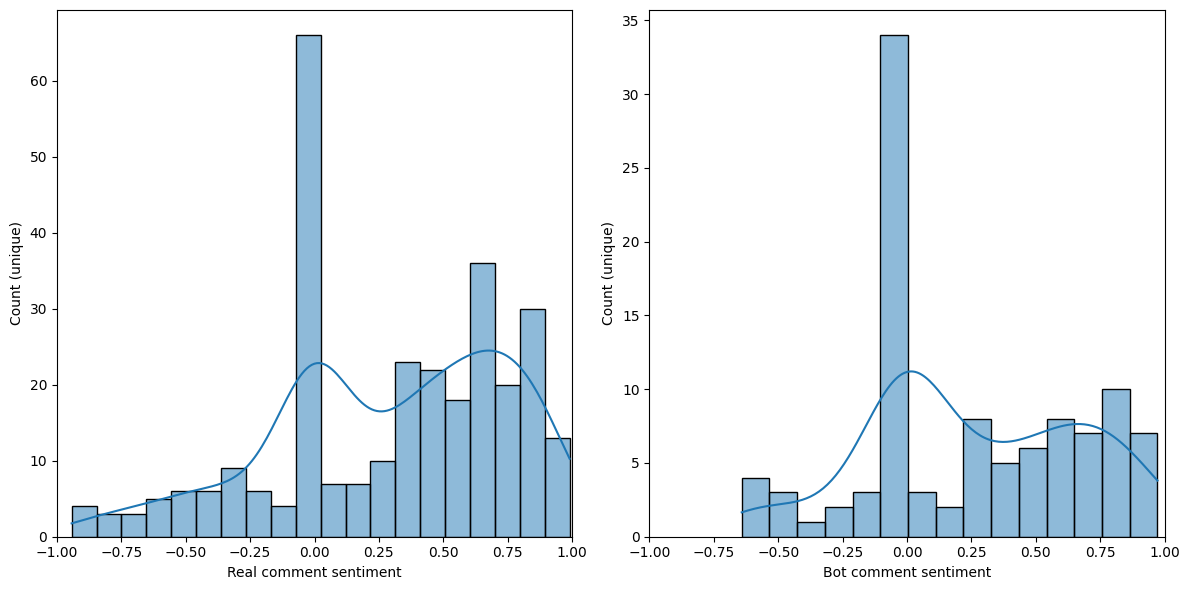

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    sns.histplot(df_gen_res['DEV__Sentiment__compound'], ax=axs[0], bins=20, kde=True)
    axs[0].set_xlabel('Real comment sentiment')
    axs[0].set_ylabel('Count (unique)') # Solidarity with second plot.
    axs[0].set_xlim(-1, 1)

    sns.histplot(df_bot_res['DEV__Sentiment__compound'], ax=axs[1], bins=15, kde=True)
    axs[1].set_xlabel('Bot comment sentiment')
    axs[1].set_ylabel('Count (unique)') # We do not care about the duplicate comments here.
    axs[1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

This plot consists of two histograms, each representing the distribution of sentiment scores for "Real Comments" and "Bot Comments." The x-axis in both plots shows the sentiment score, which ranges from -1 (most negative) to +1 (most positive). The y-axis shows the count of unique comments within each sentiment bucket. A trend line is overlaid on each histogram to illustrate the general distribution pattern.

***Left Plot: Sentiment Distribution for Real Comments***
- **Sentiment Distribution:** The histogram shows a concentration of real comments around a neutral sentiment score (0). There is a notable peak at 0, indicating that a large number of real comments are neutral. There is also a spread of comments with positive sentiment (0 to +1), with a declining number as the sentiment becomes more positive. A smaller number of comments fall into the negative sentiment range (-1 to 0).
- **Interpretation:** This suggests that real comments are relatively balanced in sentiment, with a significant portion being neutral and the rest spread across the sentiment spectrum, with a slight lean towards positivity.

***Right Plot: Sentiment Distribution for Bot Comments***
- **Sentiment Distribution:** Similar to the real comments, bot comments also exhibit a strong concentration around a neutral sentiment score (0), with a significant peak at this value. There is a smaller spread of bot comments across the positive sentiment range (0 to +1) and a lower presence of comments in the negative sentiment range (-1 to 0).
- **Interpretation:** The sentiment distribution for bot comments appears more controlled or uniform, with a large number of comments being neutral, and the remaining comments distributed more evenly across positive sentiment, with fewer in the negative range. This suggests that bot comments may be intentionally designed to avoid extreme negativity, potentially to create a more positive or neutral impression.

***Comparison***
- **Neutral Sentiment:** Both real and bot comments show a strong peak at the neutral sentiment score (0), indicating a large proportion of neutral comments.
- **Positive Sentiment:** Both sets of comments have a spread towards positive sentiment, but real comments show a broader range and more variation.
- **Negative Sentiment:** There are fewer comments with negative sentiment in both cases, but real comments exhibit slightly more variation in this range than bot comments.

The plots suggest that while both real and bot comments tend to cluster around a neutral sentiment, real comments display a more natural distribution with a wider spread across positive and negative sentiments. In contrast, bot comments are more likely to remain neutral or slightly positive, with less variation. This could indicate an intentional design in bot comments to avoid negativity and potentially influence sentiment perception by promoting a more neutral or positive outlook.

# Detailed Examination of Bot Comments

- Let us now take a closer look at the bot comments. Which perspectives do they predominantly support? Are there notable clusters of similar comments? Do the sentiment analysis values align with the actual content?

- The majority of bot comments appear to support Russia, though there are also opposing bots with an equal number of comments.

- Some bot comments seem to function as engagement boosters or even engagement bait.

- Additionally, there are bot comments in various languages, typically one per language, likely intended to simulate global engagement.

- While sentiment analysis values do not always perfectly correlate with the actual content—occasionally failing to capture some nuances in the data—they are generally acceptable.

------

- Furthermore, all bot comments, within a margin of error, were published simultaneously and exhibit the same number of likes and replies.

- This leads to the conclusion that the likes and replies for these comments were also pre-determined during the generation of bot comments.

- Consequently, we can derive valuable insights by analyzing the selected values for positive and negative bot comments.

- Upon reviewing the bot comments, it is evident that negative comments were generated with a lower number of likes and replies compared to positive comments.

In [39]:
df_bot_unique_flatindex = df_bot_unique.copy()
df_bot_unique_flatindex.reset_index(inplace=True)
df_bot_unique_flatindex.head()

Comment  Likes       Reply Count  \
                                                       mean count        mean   
0  "Sometimes people don't want to hear the truth...   29.0   997         8.0   
1                             1:10:54 same question!    0.0   997         0.0   
2  34.8 million views on X after 3 hours.\nOnly a...  219.0   997        26.0   
3  46:22 - a bit disgusting moment, but translati...    0.0   997         0.0   
4                                862 is 9th century.    1.0   997         0.0   

         
  count  
0   997  
1   997  
2   997  
3   997  
4   997

In [40]:
df_bot_unique_flatindex.columns = df_bot_unique_flatindex.columns.map('_'.join)
df_bot_unique_flatindex.head()

,Comment_,Likes_mean,Likes_count,Reply Count_mean,Reply Count_count
0,"""Sometimes people don't want to hear the truth...",29.0,997,8.0,997
1,1:10:54 same question!,0.0,997,0.0,997
2,34.8 million views on X after 3 hours.\nOnly a...,219.0,997,26.0,997
3,"46:22 - a bit disgusting moment, but translati...",0.0,997,0.0,997
4,862 is 9th century.,1.0,997,0.0,997


In [41]:
df_bot_unique_flatindex['count'] = df_bot_unique_flatindex['Likes_count']
df_bot_unique_flatindex['Likes_mean'] = df_bot_unique_flatindex['Likes_mean'].round(2)
df_bot_unique_flatindex['Reply Count_mean'] = df_bot_unique_flatindex['Reply Count_mean'].round(2)
df_bot_unique_flatindex = df_bot_unique_flatindex.drop(['Likes_count', 'Reply Count_count'], axis=1)

df_bot_unique_flatindex = df_bot_unique_flatindex.sort_values(by=['count', 'Likes_mean'], ascending=False).reset_index()
df_bot_unique_flatindex.head()

,index,Comment_,Likes_mean,Reply Count_mean,count
0,97,❤,2.0,0.0,1994
1,37,In the time it took me to watch this in 1.5x s...,542.0,35.0,997
2,12,Cant wait to see how the press spins this tomo...,471.0,16.0,997
3,36,Im Russian but I prefer to watch this in Engli...,461.0,28.0,997
4,56,Thank you Tucker for allowing him to speak wit...,402.0,11.0,997


In [47]:
df_bot_unique_flatindex.rename(columns={'Comment_':'Comment'}, inplace=True)

merged_bot_df = df_bot_unique_flatindex.merge(df_bot_res, on='Comment')
merged_bot_df.head()

,index,Comment,Likes_mean,Reply Count_mean,count,Likes,Reply Count,DEV__PreprocessedComment,DEV__Sentiment__neg,DEV__Sentiment__neu,DEV__Sentiment__pos,DEV__Sentiment__compound
0,97,❤,2.0,0.0,1994,2.0,0.0,❤,0.000,0.000,0.000,0.0000
1,37,In the time it took me to watch this in 1.5x s...,542.0,35.0,997,542.0,35.0,time took watch 1.5x speed view went 500k 1.7 ...,0.064,0.711,0.225,0.7177
2,12,Cant wait to see how the press spins this tomo...,471.0,16.0,997,471.0,16.0,cant wait see press spin tomorrow .,0.000,1.000,0.000,0.0000
3,36,Im Russian but I prefer to watch this in Engli...,461.0,28.0,997,461.0,28.0,im russian prefer watch english order understa...,0.000,0.787,0.213,0.6908
4,56,Thank you Tucker for allowing him to speak wit...,402.0,11.0,997,402.0,11.0,thank tucker allowing speak without interrupti...,0.000,0.477,0.523,0.5248


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(merged_bot_df)

,index,Comment,Likes_mean,Reply Count_mean,count,Likes,Reply Count,DEV__PreprocessedComment,DEV__Sentiment__neg,DEV__Sentiment__neu,DEV__Sentiment__pos,DEV__Sentiment__compound
0,97,❤,2.0,0.00,1994,2.0,0.000000,❤,0.000,0.000,0.000,0.0000
1,37,In the time it took me to watch this in 1.5x speed the views went from 500k to over 1.7 million. People are starving for real dialogue and real news. They want to hear things from the horses mouth instead of being fed what others think they should hear. Whether what he said was true or not we want to hear both sides of the story. Great job Tucker!,542.0,35.00,997,542.0,35.000000,time took watch 1.5x speed view went 500k 1.7 million . people starving real dialogue real news . want hear thing horse mouth instead fed others think hear . whether said true want hear side story . great job tucker !,0.064,0.711,0.225,0.7177
2,12,Cant wait to see how the press spins this tomorrow.,471.0,16.00,997,471.0,16.000000,cant wait see press spin tomorrow .,0.000,1.000,0.000,0.0000
3,36,"Im Russian but I prefer to watch this in English in order to understand has Putins speech been translated correctly. So far Im satisfied with translation good work, still watching. Guys forward & repost this video.",461.0,28.00,997,461.0,28.000000,"im russian prefer watch english order understand putin speech translated correctly . far im satisfied translation good work , still watching . guy forward & repost video .",0.000,0.787,0.213,0.6908
4,56,Thank you Tucker for allowing him to speak without you interrupting.,402.0,11.00,997,402.0,11.000000,thank tucker allowing speak without interrupting .,0.000,0.477,0.523,0.5248
5,78,Watched from Canada. This interview needed to happen.,390.0,1.00,997,390.0,1.000000,watched canada . interview needed happen .,0.000,1.000,0.000,0.0000
6,77,Very interesting and as a free Citizen of the US I deserved the ability to hear it.,389.0,14.00,997,389.0,14.000000,interesting free citizen u deserved ability hear .,0.000,0.265,0.735,0.8074
7,29,"I can say that translator was 99% close to his speech!! We made double check in rus and eng! Be sure translator made all meaning correct! Спасибо, Такер!",237.0,7.00,997,237.0,7.000000,"say translator 99 % close speech ! ! made double check ru eng ! sure translator made meaning correct ! спасибо , такер !",0.000,0.822,0.178,0.5374
8,79,Watched from Florida. Thank you Tucker!God Bless Earth ❤,230.0,3.00,997,230.0,3.000000,watched florida . thank tucker ! god bless earth ❤,0.000,0.342,0.658,0.7712
9,2,34.8 million views on X after 3 hours.\nOnly about 321k on YouTube.🤔🤔🤔,219.0,26.00,997,219.0,26.000000,34.8 million view x 3 hour . 321k youtube.🤔🤔🤔,0.000,1.000,0.000,0.0000


In [49]:
ut_df = df.groupby('Comment').nunique()
ut_df = ut_df[ut_df['Anonymized Author'] > 1] # Authors are unique, so this is basically ID.

display(ut_df[ut_df['Published At']>1]) # Bot comments that were NOT published all at the same time.
display(ut_df[ut_df['Likes']>1]) # Bot comments that don't have the exact same number of likes.
display(ut_df[ut_df['Reply Count']>1]) # Bot comments that don't have the exact same number of replies.

,Anonymized Author,Published At,Likes,Reply Count,DEV__IsBotComment
Comment,,,,,
"The look on Tucker's face at the end of interview, sums it all.",2,2,2,2,1
❤,1994,2,1,1,1


,Anonymized Author,Published At,Likes,Reply Count,DEV__IsBotComment
Comment,,,,,
"The look on Tucker's face at the end of interview, sums it all.",2,2,2,2,1


,Anonymized Author,Published At,Likes,Reply Count,DEV__IsBotComment
Comment,,,,,
First I am an Air Force Veteran and Republican. I have voted republican since 1988. I voted for Trump twice. All I can say is Wow. I understand some of Putin's point of view but this is total madness. I actually expected hard questioning. Putin is obviously delusional and you just fed his ego.,997,1,1,2,1
"The look on Tucker's face at the end of interview, sums it all.",2,2,2,2,1


# Conclusion

The analysis revealed that a significant majority of the comments related to the Putin-Carlson interview were bot-generated, with these comments predominantly skewing towards positive sentiment. These bot comments were published simultaneously and exhibited identical engagement metrics, suggesting a coordinated effort to influence public perception. In contrast, genuine user comments, though fewer in number, displayed a broader range of sentiments.

The project highlights the pervasive nature of bot activity in online discourse, particularly in politically sensitive contexts. It underscores the need for robust detection and moderation mechanisms to ensure that public sentiment analysis remains accurate and reflective of genuine opinions. The findings from this project can contribute to the development of more sophisticated tools to combat the influence of bot-generated content, ultimately promoting a more authentic and trustworthy online environment.